## Simple Kaggle submission
You may use this to test making a submission

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
# Reading in data for both train.csv and test.csv

df = pd.read_csv('datasets/train.csv')
kag_test_df = pd.read_csv('datasets/test.csv')

In [3]:
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
#Snake case all columns
df.columns =[col.replace(' ', '_').lower() for col in df.columns]
kag_test_df.columns =[col.replace(' ', '_').lower() for col in kag_test_df.columns]

### Modeling

#### Feature Selection

In [5]:
# Take all the numerical columns from our train set, and impute the median for any NAN values

# Get all columns that are numerical
num_features = df.select_dtypes(include= [np.number]).columns.tolist()
num_features.remove('saleprice') # And remove saleprice from our features

# Replace null values with the median of that column
[df[feat].fillna(value= df[feat].median(), inplace=True) for feat in num_features]
[kag_test_df[feat].fillna(value= kag_test_df[feat].median(), inplace=True) for feat in num_features];

# Show which of those columns have null values
# print(df[num_features].isnull().sum())
# print(kag_test_df[num_features].isnull().sum())

<AxesSubplot:>

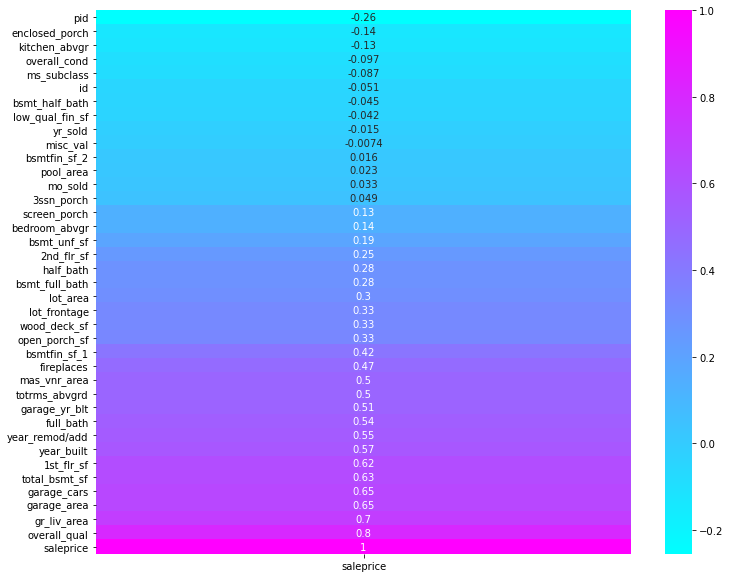

In [6]:
# Correlation heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'),
            annot = True,
            cmap = 'cool',
           )

In [7]:
X = df[num_features]
y = df['saleprice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)

In [9]:
# instantiate and fit

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# R2 scores for training and test data
#lr.score(X_train, y_train), lr.score(X_test, y_test)

In [11]:
#R2 Score
print('r2 scores: ', lr.score(X_train, y_train), lr.score(X_test, y_test))

#Cross val score
print('cross val scores: ', cross_val_score(lr, X_train, y_train).mean(), cross_val_score(lr, X_test, y_test).mean() )

r2 scores:  0.8282256343275642 0.8600206683198471
cross val scores:  0.7659639463217884 0.878815185619396


### Predictions

In [12]:
# The predictions need to be done on the same features that we modeled on.
# Creating a variable to hold all our predictions

preds =lr.predict(kag_test_df[num_features])

Remember we got and error because our column names were different. Any changes we do on our modeled features we need to do on the data from the test.csv

Here we had simply changed the case of the names and replaced spaces with _ but even superficial changes like that matter.

In [13]:
# changing the test.csv to mirror the train.csv

kag_test_df.columns =[col.replace(' ', '_').lower() for col in kag_test_df.columns]

In [14]:
# Creating a new column that is the saleprice. These are the values from the .predict.

kag_test_df['saleprice'] = preds

In [15]:
# checking 'saleprice' is at the end

kag_test_df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,124284.222562
1,2718,905108090,90,RL,68.0,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,154034.504883


## save out

In [16]:
# Format df for Kaggle

kaggle_submission_df = kag_test_df[['id', 'saleprice']]

In [17]:
# To csv with no index

kaggle_submission_df.to_csv('datasets/kaggle_sub1.csv', index=False)

In [20]:
kaggle_submission_df.shape

(878, 2)